In [1]:
supress_warnings = False #True #False

In [2]:
# Input configuration
import os
os.chdir('..\../configuration')
%run config.ipynb

# Import all
os.chdir("../code/methods")
%run 101_imports_updated.ipynb

# Set paths
os.chdir("../setup_paths")
%run 001_setup_path.ipynb

# Load local methods
os.chdir("../methods")
local_methods = os.getcwd()
%run 101_imports_updated.ipynb

# Load all methods from methods framework
# Set path to methods path
os.chdir(methods_path)
%run 010_methods_all.ipynb

# Display settings
pd.set_option('display.max_columns', None)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
# Load data
df = read_file(df_processed_final,output_path_csvs) 
df.head(10)

# Separate X and y
X = df.drop(target,axis=1)
y = df[target]
X.head(10)


Pclass        Age     SibSp     Parch       Fare  Embarked_Q  Embarked_S  \
0  2.310034  29.696014  0.521984  0.383315  32.192098           0           1   
1  2.310034  29.696014  0.521984  0.383315  32.192098           0           1   
2  3.000000  35.000000  0.000000  0.000000   8.050000           0           1   
3  3.000000  29.696014  0.000000  0.000000   8.458300           1           0   
4  1.000000  54.000000  0.000000  0.000000  51.862500           0           1   
5  3.000000   2.000000  3.000000  1.000000  21.075000           0           1   
6  3.000000  27.000000  0.000000  2.000000  11.133300           0           1   
7  2.000000  14.000000  1.000000  0.000000  30.070800           0           0   
8  3.000000   4.000000  1.000000  1.000000  16.700000           0           1   
9  1.000000  58.000000  0.000000  0.000000  26.550000           0           1   

   Sex_male  
0         1  
1         1  
2         1  
3         1  
4         1  
5         1  
6         0  
7         0  
8         0  
9         0

In [4]:
# Drop correlated variables
threshold=0.545
X,to_drop = drop_correlated_columns(X,threshold)

In [5]:
# Split data into train and test
test_size=0.20
random_state=100
X_train,X_test,y_train,y_test = split(X,y,test_size,random_state)

print(' Shape of train set :',X_train.shape)
log_to_file('No.of records in train set : ',output_path_results)
log_to_file_result(X_train.shape[0],output_path_results)

print(' Shape of test set :',X_test.shape)
log_to_file('No.of records in test set : ',output_path_results)
log_to_file_result(X_test.shape[0],output_path_results)

 Shape of train set : (711, 7)
 Shape of test set : (178, 7)


In [6]:
# Scaling
if(algo == 'KN' or algo == 'XG'):
    print(algo)
    print('X_train: \n',X_train.head())
    print('X_test: \n ',X_test.head())
    X_train,X_test = scaling(X_train,X_test)
    print('X_train: \n',X_train)
    print('X_test: \n ',X_test)

 
 Data Set shape is: 
 889 7
1. feature 1 Age (0.377036)
2. feature 6 Sex_male (0.299449)
3. feature 0 Pclass (0.144836)
4. feature 2 SibSp (0.074587)
5. feature 3 Parch (0.057780)
6. feature 5 Embarked_S (0.033225)
7. feature 4 Embarked_Q (0.013087)
 Features used : Age           0.377036
Sex_male      0.299449
Pclass        0.144836
SibSp         0.074587
Parch         0.057780
Embarked_S    0.033225
Embarked_Q    0.013087
dtype: float64


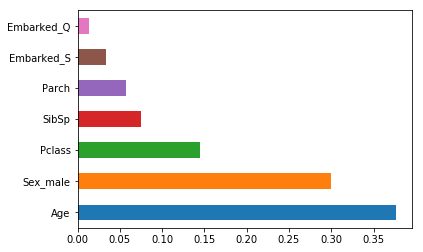

In [7]:
# Train the model
X_train,y_train,model = train_model(X_train,X_test,y_train,y_test,X,y,algo,df)
if(algo == 'RF'):
    feat_importances = feature_importance(X,model) # Causing warning in log
    print(' Features used :', feat_importances.sort_values(ascending =False))
    log_to_file('Features used : ',output_path_results)
    log_to_file_result(feat_importances.sort_values(ascending =False),output_path_results)
    if(supress_warnings != True):
        feat_importances.nlargest(X.shape[1]).plot(kind='barh')

In [8]:
# Save model
save_model(models_path,model,algo)

if(algo == 'SV'):
    # Predict the results
    pred,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)
elif(algo =='XG'):
    pred,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)
else:
    # Predict the results    
    pred,pred_proba,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)

In [9]:
# Performance results
# Confusion Matrix
print('Confusion Matrix : \n ',conf_matrix)
log_to_file('Confusion Matrix :',output_path_results)
log_to_file_result(conf_matrix,output_path_results)

# Classification Report
print(' \n Classification Report : \n ',clas_report)
log_to_file(' Classification Report :',output_path_results)
log_to_file_result(clas_report,output_path_results)

# Accuracy
acc_score =acc_score*100
acc_score = str(round(acc_score, 2))
print(' \n Accuracy : \n ',acc_score)
log_to_file(' Accuracy :',output_path_results)
log_to_file_result(acc_score,output_path_results)


Confusion Matrix : 
  [[105  19]
 [ 14  40]]
 
 Classification Report : 
               precision    recall  f1-score   support

          0       0.88      0.85      0.86       124
          1       0.68      0.74      0.71        54

avg / total       0.82      0.81      0.82       178

 
 Accuracy : 
  81.46


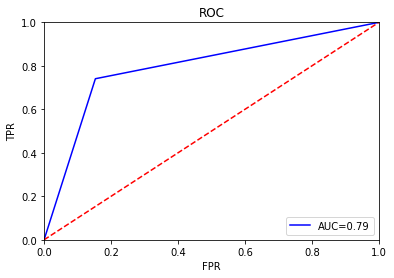

In [10]:
# ROC curve
if(supress_warnings != True): # causing warning
    roc_curve_plot(y_test,pred)

In [11]:
# Deciles
decile_df = pd.DataFrame()
decile_df['y_true'] = y_test
# decile_df['y_prob'] = pred_proba
decile_df['y_pred'] = pred
# decile_df['decile'] = pd.cut(decile_df['y_prob'],10,labels=range(10,0,-1))
if(algo != 'SV'):
    decile_df['y_prob'] = pred_proba
    decile_df['decile'] = pd.cut(decile_df['y_prob'],10,labels=range(10,0,-1))

print('Decile Report :')
decile_results = decile_analysis(decile_df,algo)
print(decile_results)
log_to_file('Decile Report :',output_path_results)
log_to_file_result(decile_results,output_path_results)

Decile Report :
base_response_rate : 
 30.34
        zero  one  min_prob  max_prob  count   gain  cum_gain  penetration
decile                                                                    
1.0        1   17  0.970000  1.000000     18  31.48     31.48    94.444444
2.0        3   15  0.799283  0.970000     18  27.78     59.26    83.333333
3.0       12    6  0.570000  0.770000     18  11.11     70.37    33.333333
4.0       12    6  0.305932  0.538307     18  11.11     81.48    33.333333
5.0       17    1  0.193333  0.305932     18   1.85     83.33     5.555556
6.0       17    1  0.124334  0.190833     18   1.85     85.18     5.555556
7.0       16    2  0.070190  0.124334     18   3.70     88.88    11.111111
8.0       16    2  0.030000  0.070000     18   3.70     92.58    11.111111
9.0       18    0  0.000769  0.030000     18   0.00     92.58     0.000000
10.0      12    4  0.000000  0.000000     16   7.41     99.99    25.000000
